In [2]:
# Imports

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import itertools
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm

In [109]:
# Load Wage data

data_in = pd.read_csv("Wage.csv", index_col=0)

# data_in.rename(columns={data_in.columns[0]:'Seq_no'}, inplace=True)

# data_in.drop(columns=['Seq_no'], inplace=True)

# Remove missing value
# data_in = data_in.loc[ data_in['horsepower'] != '?' ]

# Change datatype
# data_in['horsepower'] = data_in['horsepower'].astype('int64')

data_in.shape
data_in.dtypes
data_in.head(30)
data_in.tail()

(3000, 12)

year            int64
age             int64
sex            object
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
377954,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
228963,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
81404,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033
453557,2009,55,1. Male,5. Separated,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913


In [110]:
data_in.sort_index().head(30)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
7373,2005,23,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.176091,65.110854
7381,2005,35,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.454845,86.042801
7401,2005,41,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.568202,96.370653
7412,2005,46,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.505150,90.481913
7415,2005,31,1. Male,1. Never Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.397940,81.283253
7420,2005,26,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.757396,116.442318
7434,2005,43,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,2. No,3.000000,20.085537
7436,2005,36,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
7495,2005,54,1. Male,5. Separated,1. White,4. College Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
7496,2005,50,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.494155,89.492480


In [4]:
data_in.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921506
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [5]:
# Check for missings

data_clean = data_in.dropna()

data_clean.shape
data_clean.head()

(3000, 12)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d537fc18>,
      dtype=object)

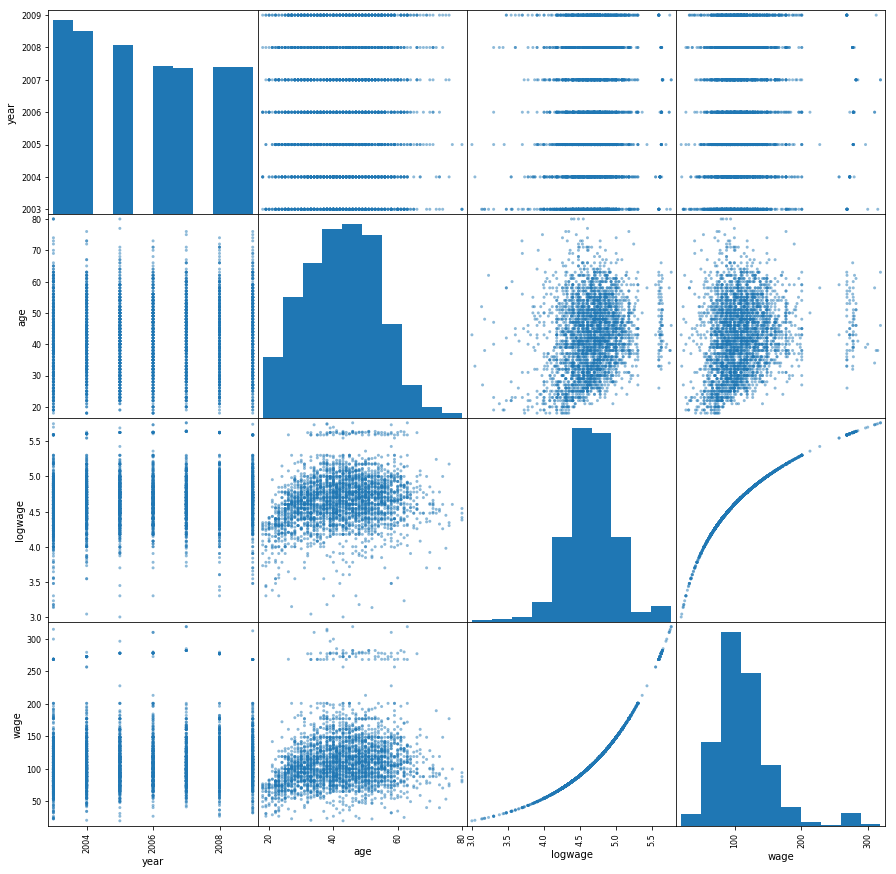

In [6]:
pd.plotting.scatter_matrix(data_in, figsize=[15, 15])

## Cross Validation core code

In [ ]:
# # 10-fold CV
# kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)
# mse = []

# for i in np.arange(1, 20):
#     pls = PLSRegression(n_components=i)
#     score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='mean_squared_error').mean()
#     mse.append(-score)

# # Plot results
# plt.plot(np.arange(1, 20), np.array(mse), '-v')
# plt.xlabel('Number of principal components in regression')
# plt.ylabel('MSE')
# plt.title('Salary')
# plt.xlim(xmin=-1)

In [28]:
def cross_validation_fn(clf, X_train, Y_train):

    clf = clf

    cv_scores = -cross_val_score(clf, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
    print('CV scores = ', cv_scores)
    mean_score = cv_scores.mean()
    print('Mean of CV splits mean squared error = ', mean_score)

    # Make cross validated predictions
    predictions = cross_val_predict(clf, X_train, Y_train, cv=10)
    plt.scatter(Y_train, predictions)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.show()

    # R-squared across all folds of the CV
    accuracy = r2_score(Y_train, predictions)
    print('Cross-Validated R-squared:', accuracy)

    # Mean Square Error
    print('Cross Validated Mean Square Error = ', mean_squared_error(Y_train,predictions))

    # Root Mean Square Error
    print('Cross Validated Root Mean Square Error = ', np.sqrt(mean_squared_error(Y_train,predictions)))

# Polynomial Regression on Age

In [7]:
X = data_in[['age']]
Y = data_in[['wage']]

poly = PolynomialFeatures(degree=4)
X_train = poly.fit_transform(X)

Y_train = Y

X_train

array([[1.000000e+00, 1.800000e+01, 3.240000e+02, 5.832000e+03,
        1.049760e+05],
       [1.000000e+00, 2.400000e+01, 5.760000e+02, 1.382400e+04,
        3.317760e+05],
       [1.000000e+00, 4.500000e+01, 2.025000e+03, 9.112500e+04,
        4.100625e+06],
       ...,
       [1.000000e+00, 2.700000e+01, 7.290000e+02, 1.968300e+04,
        5.314410e+05],
       [1.000000e+00, 2.700000e+01, 7.290000e+02, 1.968300e+04,
        5.314410e+05],
       [1.000000e+00, 5.500000e+01, 3.025000e+03, 1.663750e+05,
        9.150625e+06]])

In [16]:
# Fit linear model - StatsModel

X_test2 = sm.add_constant(poly.fit_transform(X))
est = sm.OLS(Y, X_test2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Mon, 20 May 2019   Prob (F-statistic):           2.77e-57
Time:                        15:51:14   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.0

CV scores =  [1618.06650583 1900.71681419 1512.62750537 1475.43881005 1666.86453555
 1226.64394589 1371.53643983 1855.79003821 1732.97323454 1578.69872595]
Mean of CV splits mean squared error =  1593.935655539456


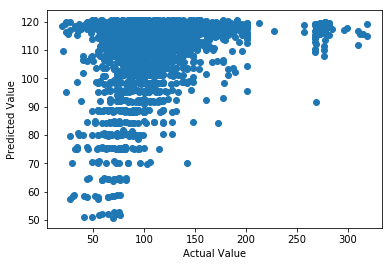

Cross-Validated R-squared: 0.08431090991414358
Cross Validated Mean Square Error =  1593.935655539456
Cross Validated Root Mean Square Error =  39.9241237291372


In [29]:
# Cross Validation - polynomials to order 4

clf = linear_model.LinearRegression()

cross_validation_fn(clf, X_train, Y_train)

CV scores =  [1620.93596813 1894.9973229  1508.21753363 1468.98772837 1666.87732013
 1230.30119296 1378.22427867 1862.27304998 1738.20146215 1584.09989678]
Mean of CV splits mean squared error =  1595.311575371209


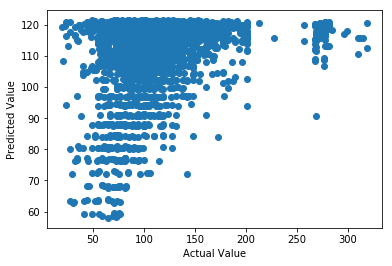

Cross-Validated R-squared: 0.08352046722946516
Cross Validated Mean Square Error =  1595.3115753712095
Cross Validated Root Mean Square Error =  39.94135169684684


In [45]:
# Cross Validation - polynomials to order 3

clf = linear_model.LinearRegression()

cross_validation_fn(clf, X_train[:,0:4], Y_train)

CV scores =  [1627.76631314 1896.72157531 1508.96469283 1471.93099316 1677.74411383
 1242.88473066 1387.38138436 1862.27062163 1745.15909374 1582.4463242 ]
Mean of CV splits mean squared error =  1600.3269842864613


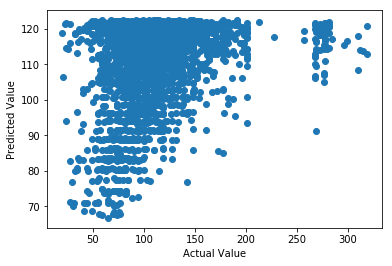

Cross-Validated R-squared: 0.08063919958854471
Cross Validated Mean Square Error =  1600.326984286461
Cross Validated Root Mean Square Error =  40.004087094776466


In [46]:
# Cross Validation - polynomials to order 2

clf = linear_model.LinearRegression()

cross_validation_fn(clf, X_train[:,0:3], Y_train)

CV scores =  [1723.65389673 2033.05297019 1611.6137366  1527.48978475 1771.70090071
 1281.77239113 1412.51805184 1954.6467254  1814.61923487 1625.67480605]
Mean of CV splits mean squared error =  1675.6742498271713


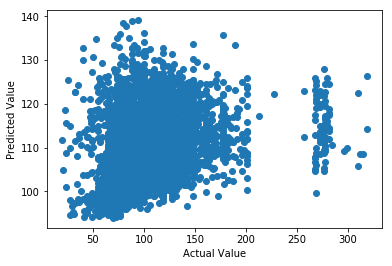

Cross-Validated R-squared: 0.03735346921188165
Cross Validated Mean Square Error =  1675.6742498271713
Cross Validated Root Mean Square Error =  40.935000303251144


In [47]:
# Cross Validation - polynomials to order 1

clf = linear_model.LinearRegression()

cross_validation_fn(clf, X_train[:,0:2], Y_train)

CV scores =  [1793.55772679 2083.20659351 1671.95873602 1590.7237486  1838.90770543
 1335.81083657 1462.9104277  2022.85043789 1906.89509827 1715.66752294]
Mean of CV splits mean squared error =  1742.2488833710188


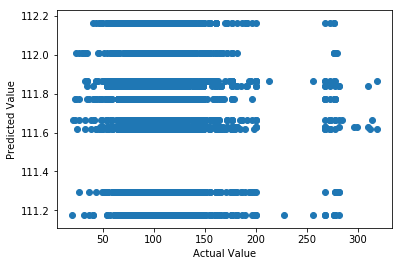

Cross-Validated R-squared: -0.0008925323758881554
Cross Validated Mean Square Error =  1742.2488833710188
Cross Validated Root Mean Square Error =  41.74025495095854


In [48]:
# Cross Validation - polynomials to order 0

clf = linear_model.LinearRegression()

cross_validation_fn(clf, X_train[:,0:1], Y_train)

# Spline - Step Function

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 1)

In [36]:
# Dividing the data into 4 bins

X_cut, bins = pd.cut(np.ravel(X_train), 4, retbins=True, right=True)
X_cut.value_counts()

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
dtype: int64

In [47]:
# Merge original X, cut X, and Y back together
del df_steps_train
# df_steps_train = pd.concat([X_train, Y_train], keys=['age','wage'], axis=1)
df_steps_train = pd.concat([X_train, Y_train], axis=1)
df_steps_train['age_cuts'] = X_cut
df_steps_train.head()

,age,wage,age_cuts
8988,49,117.146817,"(33.5, 49.0]"
305116,40,160.642475,"(33.5, 49.0]"
13066,55,81.283253,"(49.0, 64.5]"
232536,32,94.072715,"(17.938, 33.5]"
153784,42,75.043154,"(33.5, 49.0]"


In [54]:
# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_steps_train[['age_cuts']])
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80'] 
df_steps_dummies.head()

,17.938-33.5,33.5-49,49-64.5,64.5-80
8988,0,1,0,0
305116,0,1,0,0
13066,0,0,1,0
232536,1,0,0,0
153784,0,1,0,0


In [57]:
# Fitting Generalised linear models
fit_glm = sm.GLM(Y_train, df_steps_dummies).fit()

# Binning validation set into same 4 bins
bin_mapping = np.digitize(np.ravel(X_test), bins) 
X_dummies_valid = pd.get_dummies(bin_mapping)

# Removing any outliers
X_dummies_valid = pd.get_dummies(bin_mapping).drop([5], axis=1)

# Prediction
predictions = fit_glm.predict(X_dummies_valid)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions)) 
print(rmse)

39.99060078311039


Text(0.5,0.98,'Piecewise Constant')

Text(0.5,0,'age')

Text(0,0.5,'wage')

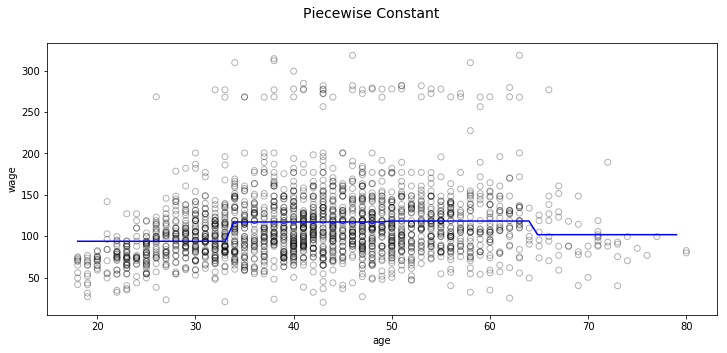

In [59]:
# We will plot the graph for 70 observations only

xp = np.linspace(X_test.min(),X_test.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
predictions_short = fit_glm.predict(X_valid_2)

# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(X_train, Y_train, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, predictions_short, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()


# Cubic and Natural Cubic Spline

39.40318768341124
39.34292609147628


(15, 85)

(0, 350)

Text(0.5,0,'age')

Text(0,0.5,'wage')

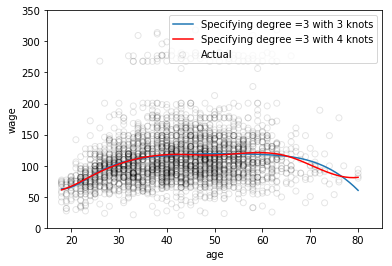

In [63]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": X_train},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(Y_train, transformed_x).fit()

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(Y_train, transformed_x2).fit()

# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": X_test}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": X_test}, return_type='dataframe'))

# Calculating RMSE values
rms1 = np.sqrt(mean_squared_error(Y_test, pred1))
print(rms1)

rms2 = np.sqrt(mean_squared_error(Y_test, pred2))
print(rms2)

# We will plot the graph for 70 observations only
xp = np.linspace(X_test.min(),X_test.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.1, label='Actual')
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

39.44823813743623


(15, 85)

(0, 350)

Text(0.5,0,'age')

Text(0,0.5,'wage')

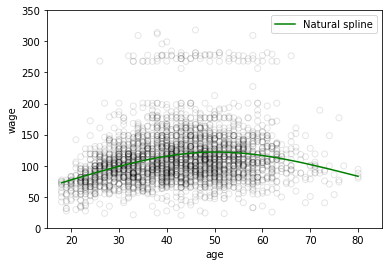

In [65]:
# Generating natural cubic spline
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')
fit3 = sm.GLM(Y_train, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": X_test}, return_type='dataframe'))

# Calculating RMSE value
rms = np.sqrt(mean_squared_error(Y_test, pred3))
print(rms)

# We will plot the graph for 70 observations only
xp = np.linspace(X_test.min(),X_test.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(X, Y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

# GAM for multiple input variables, with splines

In [115]:
# Set up data

X = data_in[['year', 'age', 'education']]
Y = data_in[['wage']]

X.sort_index().head(20)

,year,age,education
7373,2005,23,1. < HS Grad
7381,2005,35,2. HS Grad
7401,2005,41,2. HS Grad
7412,2005,46,2. HS Grad
7415,2005,31,2. HS Grad
7420,2005,26,2. HS Grad
7434,2005,43,3. Some College
7436,2005,36,2. HS Grad
7495,2005,54,4. College Grad
7496,2005,50,2. HS Grad


In [132]:
# Generating natural cubic spline
transformed_year = dmatrix("cr(year,df = 4)", {"year": X[['year']]}, return_type='dataframe')
transformed_age = dmatrix("cr(age,df = 3)", {"age": X[['age']]}, return_type='dataframe')
transformed_education = pd.get_dummies(X[['education']])
transformed_X = pd.concat([X[['year', 'age', 'education']], transformed_year, transformed_age, transformed_education], axis=1)

# transformed_X.sort_index().head(10)
# transformed_X2 = transformed_X.dropna()

transformed_X.sort_index().head()

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.33, random_state = 1)

X_train.head()

,year,age,education,Intercept,"cr(year, df=4)[0]","cr(year, df=4)[1]","cr(year, df=4)[2]","cr(year, df=4)[3]",Intercept,"cr(age, df=3)[0]","cr(age, df=3)[1]","cr(age, df=3)[2]",education_1. < HS Grad,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree
7373,2005,23,1. < HS Grad,1.0,0.0,1.0,0.0,0.0,1.0,0.794131,0.242622,-0.036752,1,0,0,0,0
7381,2005,35,2. HS Grad,1.0,0.0,1.0,0.0,0.0,1.0,0.340260,0.746997,-0.087256,0,1,0,0,0
7401,2005,41,2. HS Grad,1.0,0.0,1.0,0.0,0.0,1.0,0.156873,0.914809,-0.071682,0,1,0,0,0
7412,2005,46,2. HS Grad,1.0,0.0,1.0,0.0,0.0,1.0,0.037563,0.989722,-0.027285,0,1,0,0,0
7415,2005,31,2. HS Grad,1.0,0.0,1.0,0.0,0.0,1.0,0.481514,0.598316,-0.079830,0,1,0,0,0


,year,age,education,Intercept,"cr(year, df=4)[0]","cr(year, df=4)[1]","cr(year, df=4)[2]","cr(year, df=4)[3]",Intercept,"cr(age, df=3)[0]","cr(age, df=3)[1]","cr(age, df=3)[2]",education_1. < HS Grad,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree
8988,2005,49,3. Some College,1.0,0.000,1.000,0.000,0.000,1.0,-0.016406,1.000537,0.015869,0,0,1,0,0
305116,2007,40,4. College Grad,1.0,0.000,0.000,1.000,0.000,1.0,0.184659,0.892222,-0.076882,0,0,0,1,0
13066,2005,55,2. HS Grad,1.0,0.000,1.000,0.000,0.000,1.0,-0.083795,0.943604,0.140192,0,1,0,0,0
232536,2006,32,1. < HS Grad,1.0,-0.075,0.575,0.575,-0.075,1.0,0.445018,0.637778,-0.082796,1,0,0,0,0
153784,2003,42,2. HS Grad,1.0,1.000,0.000,0.000,0.000,1.0,0.130323,0.935000,-0.065323,0,1,0,0,0


34.798396062940036


(15, 85)

(0, 350)

Text(0.5,0,'age')

Text(0,0.5,'wage')

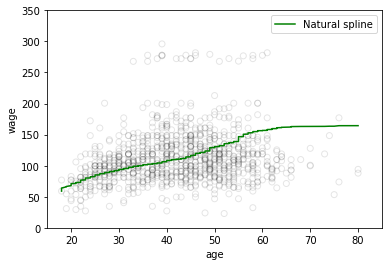

In [138]:
# Fit model
fit3 = sm.GLM(Y_train, X_train.iloc[:, 3:]).fit()

# Prediction on validation set
pred3 = fit3.predict(X_test.iloc[:, 3:])

# Calculating RMSE value
rms = np.sqrt(mean_squared_error(Y_test, pred3))
print(rms)


# Plot the spline
plt.scatter(X_test[['age']], Y_test, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(X_test[['age']].sort_values(by='age'), pred3.sort_values(),color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()